<a href="https://colab.research.google.com/github/NikitaDash/Airbnb_EDA_Analysis/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title:** **NETFLIX MOVIES AND TV SHOWS CLUSTERING**

# **Project type:** Unsupervised
# **Contribution:** Nikita Dash

#**Index:**
Project summery

Problem statement

Data Description

Importing the libraries and the dataset


Understanding data

Cleaning data

Exploratory data analysis

Data preprocessing

Clusters impelementation

Building content based recommender system

Conclusions


# **1. Project Summery:**
Netflix is a popular streaming service that provides its subscribers with a wide range of movies, TV shows, documentaries, and original content to watch on demand. The company was founded in 1997 as a DVD rental service but later pivoted to an online streaming model in 2007. Since then, Netflix has grown into one of the most popular streaming services globally, with over 200 million subscribers in more than 190 countries as of 2021.

Netflix's success is due in part to its innovative business model and emphasis on creating original content. The company invests heavily in producing its own movies and TV shows, which have won numerous awards and attracted high-profile talent. Netflix also uses sophisticated algorithms to recommend content to its users, based on their viewing history and preferences.

This project aimed to identify patterns in the content available on the platform and group them into clusters based on similarities in their genres, sub-genres, release year, and other features. The project utilized machine learning algorithms such as K-means clustering and Hierarchical Clustering to cluster the data.


# **2. Problem statement:**

- Netflix is the world's largest online streaming service provider, with over 220 million subscribers as of 2022-Q2. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscriber
churn.

- We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.

- The goal of this project is to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.



# **3. Data Description**
show_id :- Unique id for every movies/Tv shows

type :- Identifier - A movie or Tv show

title :- Title of the movie/show

director :- Director of the show

cast :- Actors involved in the show

Country :- Country of production

date_added :- Date is what added on netflix

release_year :- Actual release year of the show

rating :- TV rating of the show

duration :- Total duration in minutes or number of seasons.

listed_in :- Genre

Description :- The summary description

# **4. Importing Libraries and Data Loading:**

In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
import nltk
#import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline
sns.set()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#data importing
data = pd.read_csv('/content/drive/My Drive/Csv file/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [ ]:
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
data.describe(include = 'all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
#checking rows and columns of data
data.shape

(7787, 12)

There are 7787 rows and 12 columns in the entire dataset.

In [ ]:
#checking for duplicate values
data.duplicated().sum()

0

There is no duplicate values in the dataset.

In [ ]:
#checking for null values
data.isnull().sum()


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
#total missing or null values
data.isnull().sum().sum()

3631

<Axes: >

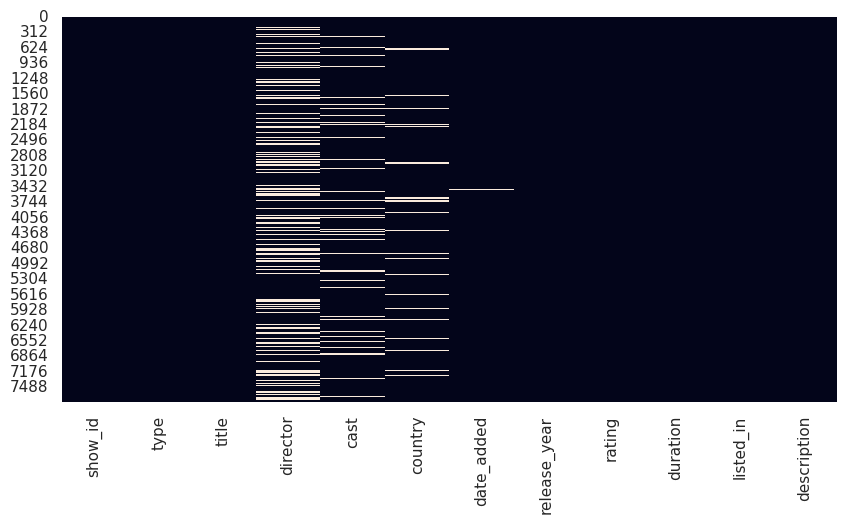

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(), cbar=False)

- A total of 3631 missing values are present in the dataset.
- The director column contain highest number of missing valus at least 2389.
- Followed by director column cast,country,data_added,rating columns also contain missing values.

In [ ]:
#columns of the data
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# **5.Data Cleaning:**

Before applying any changes to the dataset let's create a copy of the data so that we can not loose our data during the cleaning process and  can use the data whenever it is necessary.

In [ ]:
df = data.copy()

In [ ]:
#drop the show_id as it is unnecessary
df = df.drop(['show_id'], axis = 1)

## 5.1 **Handling Missing Values:**

- The missing values in the director, cast, and country attributes can be replaced with 'Unknown'
- 10 records with missing values in the date_added column can be dropped.
-     The missing values in rating can be imputed with its mode, since this attribute is discrete.

In [ ]:
#filling the mising values
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')

In [ ]:
# filling the missing values with mode
df['rating'].fillna(df['rating'].mode()[0], inplace = True)

In [ ]:
#dropping the missing values of date_added column
df = df[df['date_added'].notna()]

In [ ]:
#checking for null values
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

* Now there are no missing values in our dataset

### 5.2 **Country, listed_in:**

In [ ]:
# Top countries
df.country.value_counts()

United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

In [ ]:
# Genre of shows
df.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

* There are some movies / TV shows that were filmed in multiple countries, have multiple genres associated with it.
* To simplify the analysis, let's consider only the primary country where that respective movie / TV show was filmed.
* Also, let's consider only the primary genre of the respective movie / TV show.

In [ ]:
# Choosing the primary country and primary genre to simplify the analysis
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [ ]:
# contry in which a movie was produced
df['country'].value_counts()

United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

In [ ]:
# genre of shows
df.listed_in.value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

## 5.3 **Typecasting 'duration' from string to integer**

In [ ]:
# Splitting the duration column, and changing the datatype to integer
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [ ]:
# Number of seasons for tv shows
df[df['type']=='TV Show'].duration.value_counts()

1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: duration, dtype: int64

In [ ]:
# Movie length in minutes
df[df['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

In [ ]:
# datatype of duration
df.duration.dtype

dtype('int64')

We have successfully converted the datatype of duration column to int.

## 5.4 **Typecasting 'date_added' from string to datetime:**

In [ ]:
# Typecasting 'date_added' from string to datetime
df["date_added"] = pd.to_datetime(df['date_added'])

In [ ]:
# first and last date on which a show was added on Netflix
df.date_added.min(),df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

The shows were added on Netflix between 1st January 2008 and 16th January 2021.

In [ ]:
# Adding new attributes month and year of date added

df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df.drop('date_added', axis=1, inplace=True)

In [ ]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'month_added',
       'year_added'],
      dtype='object')

## 5.5 **Rating:**

The ratings can be changed to age restrictions that apply on certain movies and TV shows.

<Axes: xlabel='rating', ylabel='count'>

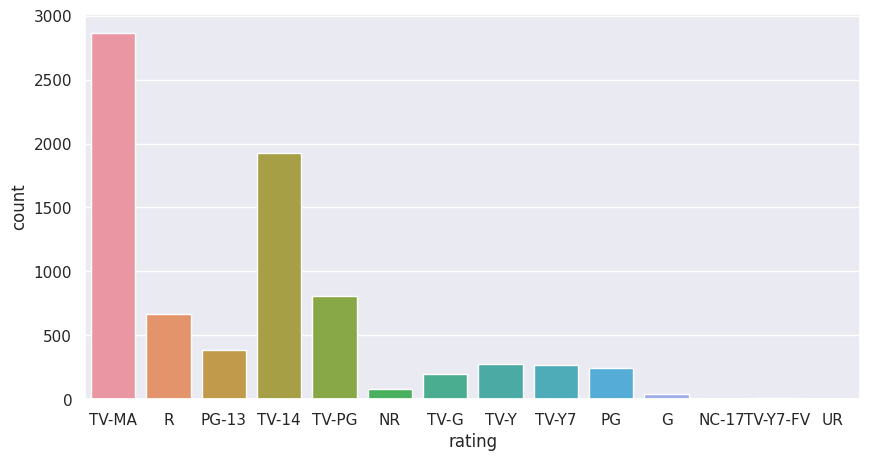

In [ ]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)

Highest number of shows in netflix are rated by TV-MA followed by TV-14,TV-PG

In [ ]:
# Age ratings
df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
#changing the values in the rating column
rating_map = {'TV-MA': 'Adults',
              'R' : 'Adults',
              'PG-13': 'Teens',
              'TV-14': 'Young',
              'TV-PG':'Older Kids',
              'NR': 'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG': 'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adults', 'Teens', 'Young', 'Older Kids', 'Kids'], dtype=object)

<Axes: xlabel='rating', ylabel='count'>

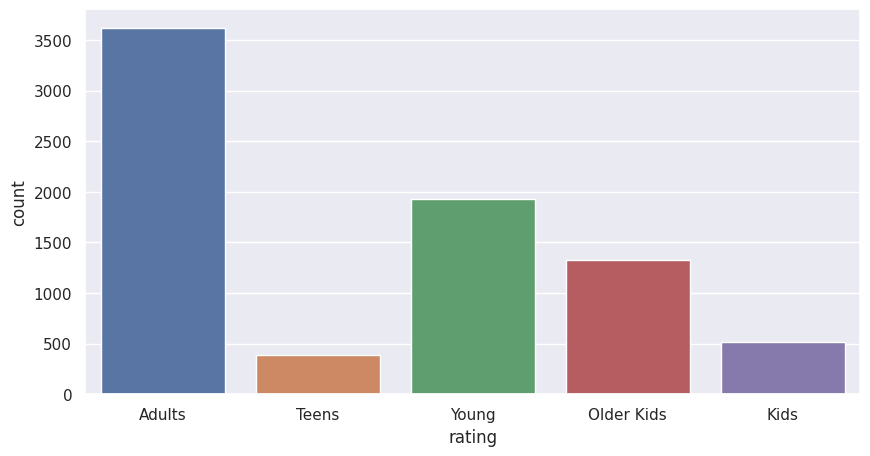

In [ ]:

#Age rating for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating', data = df)

Around 50% of shows on Netflix are produced for adult audience. Followed by young adults, older kids and kids. Netflix has the least number of shows that are specifically produced for teenagers than other age groups.

# **6. Exploratory Data Analysis:**

## 6.1 **Univatiate Analysis:**

In [ ]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'month_added',
       'year_added'],
      dtype='object')

## **type:**

Movie      5377
TV Show    2400
Name: type, dtype: int64

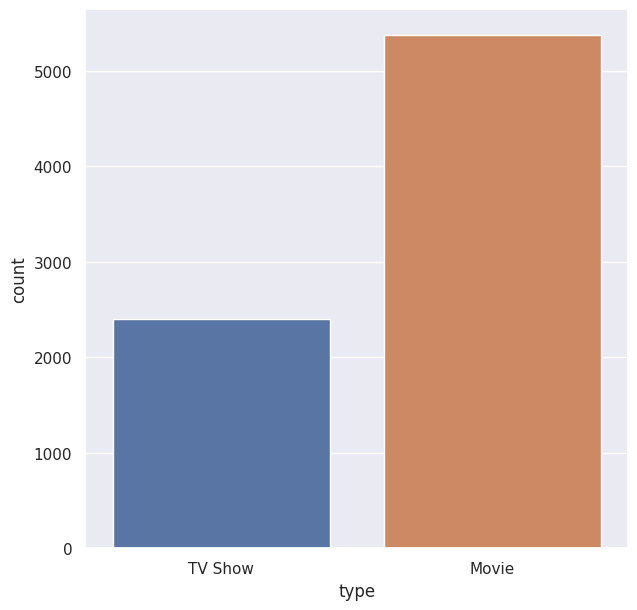

In [ ]:
#visualization value count of column type
plt.figure(figsize=(7,7))
sns.countplot(x = 'type', data = df)

df['type'].value_counts()

* We can clearly see in the count plot here that most of the content added is movies which are approximately 5000. Nearly 2500 contents are TV Shows.

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

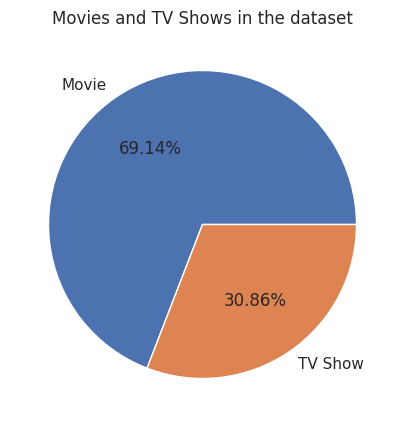

In [ ]:
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(5,5))
df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

* There are more movies (69.14%) than TV shows (30.86%) in the dataset.

##**Directors:**

In [ ]:

# count of unique director
df['director'].nunique()

4050

Unknown                   2379
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
                          ... 
Andrew C. Erin               1
Vibhu Virender Puri          1
Lucien Jean-Baptiste         1
Jason Krawczyk               1
Sam Dunn                     1
Name: director, Length: 4050, dtype: int64

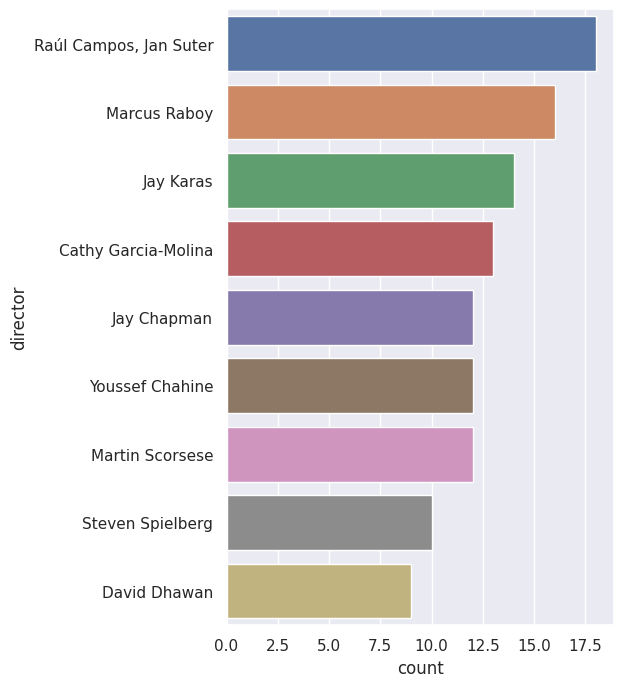

In [ ]:
#visualization of directors
plt.figure(figsize=(5,8))
sns.countplot(y=df['director'],data= df, order = df['director'].value_counts().index[1:10])

df['director'].value_counts()

*     Raul Campos and Jan Suter together have directed 18 movies / TV shows, higher than anyone in the dataset.

## **Genres:**

In [ ]:
#value counts
df['listed_in'].value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

<Axes: xlabel='count', ylabel='listed_in'>

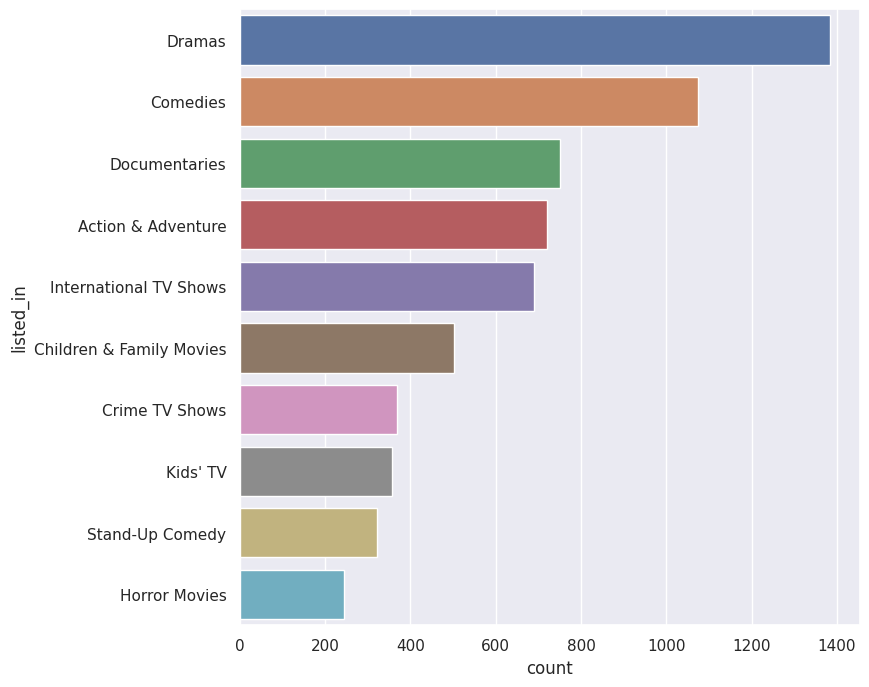

In [ ]:
#Visualisation
plt.figure(figsize = (8,8))
sns.countplot(y ='listed_in', data = df , order = df['listed_in'].value_counts().index[:10])

In [ ]:
# Share of top 3 genres
df.listed_in.value_counts().nlargest(3).sum()/len(df)*100

41.26269769834126

In [ ]:
# Share of top 10 genres
df.listed_in.value_counts().nlargest(10).sum()/len(df)*100

82.44824482448246

* The dramas is the most popular genre followed by comedies and documentaries.
* These three genres account for about 41% of all movies and TV shows.
* This value increases to about 82% for top 10 genres.

## **Countries:**

Text(0.5, 1.0, ' Top 10 countries with the highest number of shows')

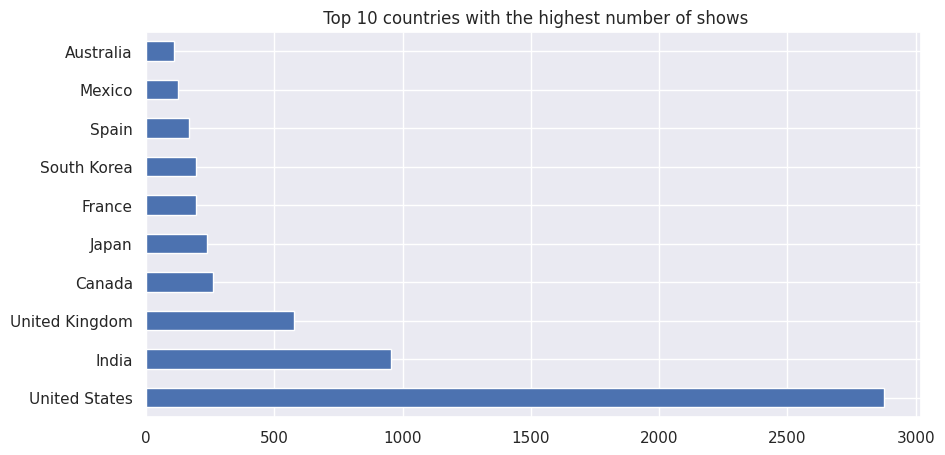

In [ ]:
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(10,5))
df[~(df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh')
plt.title(' Top 10 countries with the highest number of shows')

* The highest number of movies / TV shows were based out of the US, followed by India and UK.

In [ ]:
# % share of movies / tv shows by top 3 countries
df.country.value_counts().nlargest(3).sum()/len(df)*100

56.69281213835669

In [ ]:
# % share of movies / tv shows by top 10 countries
df.country.value_counts().nlargest(10).sum()/len(df)*100

78.32068921177832

* The top 3 countries together account for about 56% of all movies and TV shows in the dataset.
* This value increases to about 78% for top ten countries.

## **release year of movies and tv shows:**

Text(0.5, 1.0, 'distribution by released year')

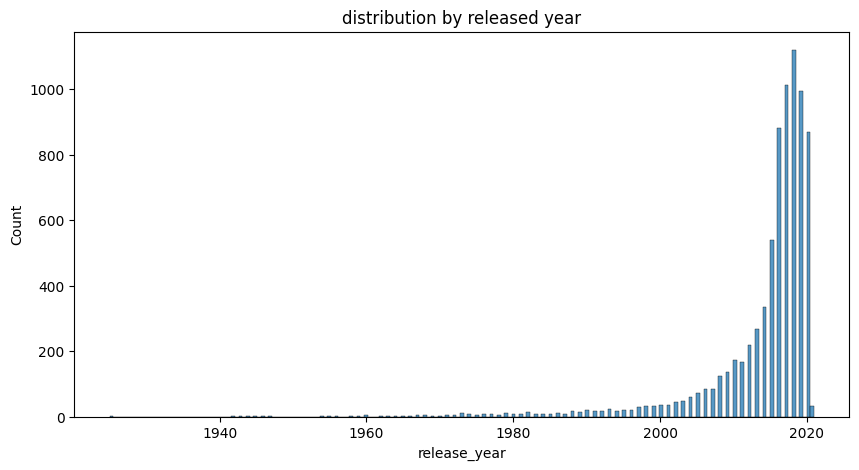

In [ ]:
# Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'])
plt.title('distribution by released year')

* Netflix has greater number of new movies / TV shows than the old ones.

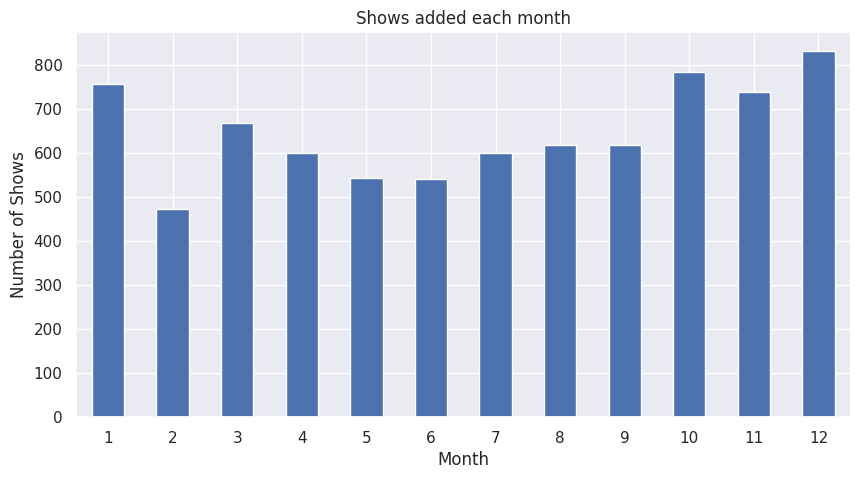

In [ ]:


#Number of shows added on different months
plt.figure(figsize=(10, 5))
df['month_added'].value_counts().sort_index().plot(kind='bar')
plt.title('Shows added each month')
plt.xlabel('Month')
plt.ylabel('Number of Shows')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


* Over the years a greater number of shows were added in the months of October, November, December, and January.

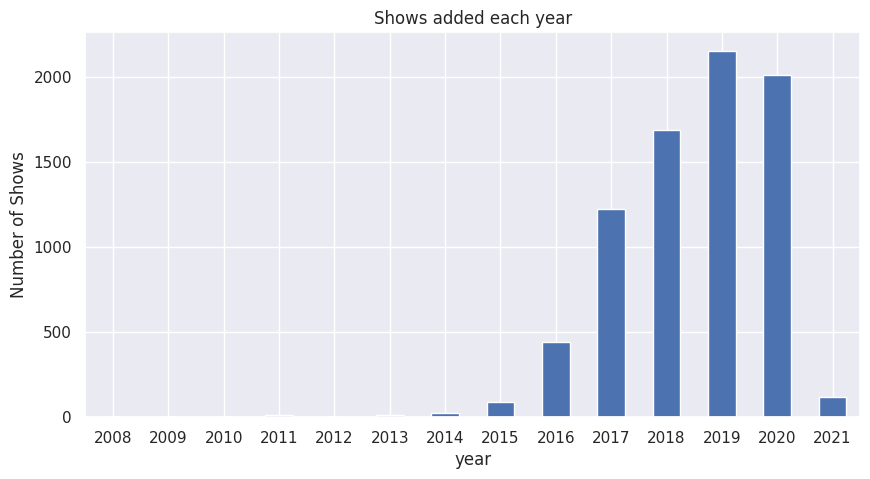

In [ ]:
# Number of shows added over the years
plt.figure(figsize=(10, 5))
df['year_added'].value_counts().sort_index().plot(kind='bar')
plt.title('Shows added each year')
plt.xlabel('year')
plt.ylabel('Number of Shows')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

* Netflix continuous to add more shows on its platform over the years.
There is a decrease in the number of shows added in the year 2020,  which might be attributed to the covid-19-induced lockdowns, which halted the creation of shows.
* We have Netflix data only up to 16th January 2021, hence there are less movies added in this year.

## **different age group:**

Text(0.5, 1.0, 'Number of shows on Netflix for different age groups')

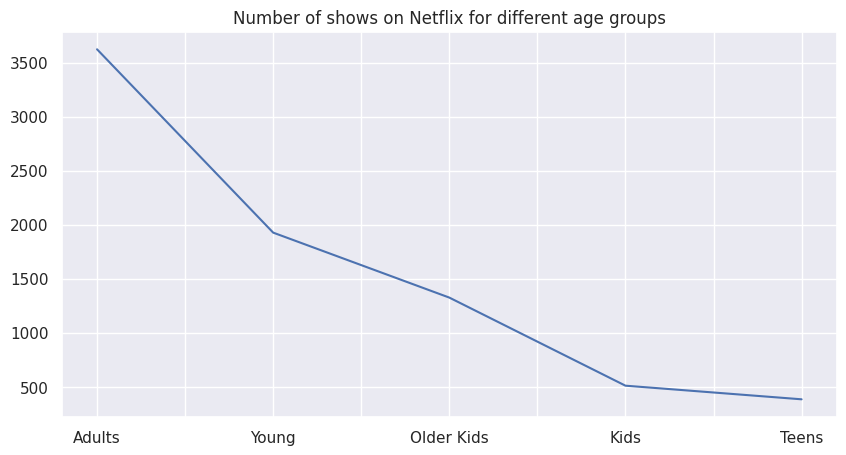

In [ ]:
# Number of shows on Netflix for different age groups
plt.figure(figsize=(10,5))
df.rating.value_counts().plot(kind='line')
plt.title('Number of shows on Netflix for different age groups')

* The majority of the shows on Netflix are catered to the needs of adultand young adult population.

## **Cast:**

In [ ]:
# extracting top crew members from cast.
crew_list=[]
for i in df['cast']:
  i=i.split(',')
  for j in i:
    crew_list.append(j)


In [ ]:

# converting the list into dataframe
crew_df = pd.DataFrame(crew_list)
crew_df.rename(columns = {0:'actr_actrs'}, inplace = True)
crew_df

actr_actrs
0                 João Miguel
1            Bianca Comparato
2                Michel Gomes
3             Rodolfo Valente
4             Vaneza Oliveira
...                       ...
56599   Chittaranjan Tripathy
56600                 Nasty C
56601           Adriano Zumbo
56602             Rachel Khoo
56603                 Unknown

[56604 rows x 1 columns]

<Axes: xlabel='count', ylabel='actr_actrs'>

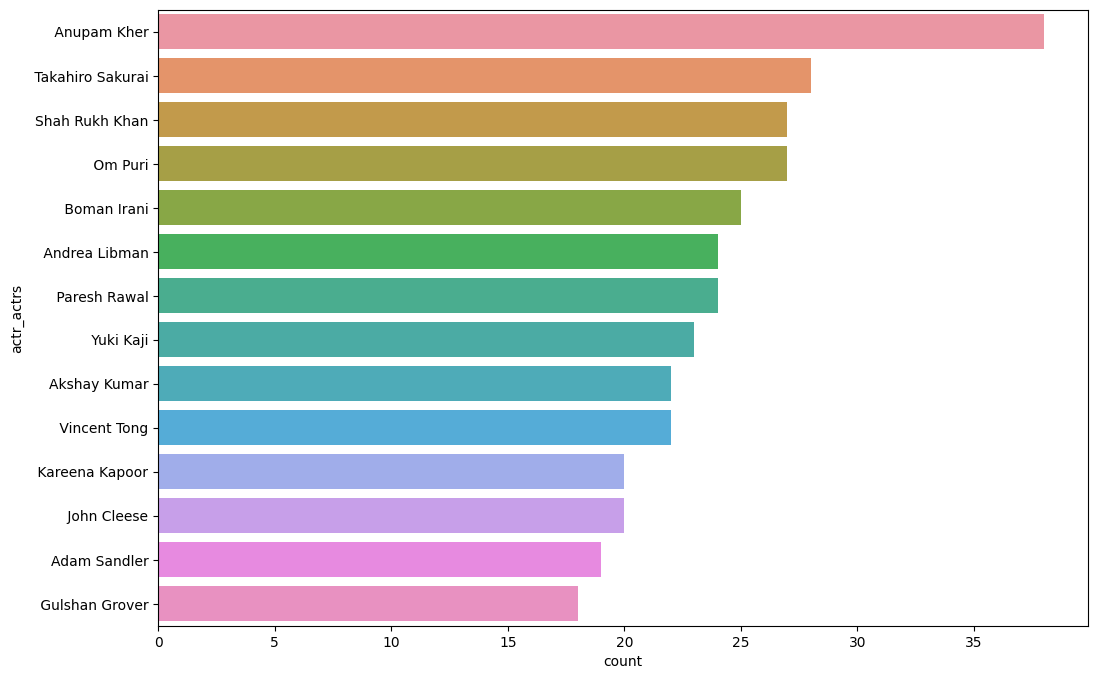

In [ ]:
# top 15 actor or actress on netflix.
plt.figure(figsize=(12,8))
sns.countplot(y= crew_df['actr_actrs'], data = crew_df, order = crew_df['actr_actrs'].value_counts().index[1:15])


* Anupam Kher, Takahiro Sakurai, Shah Rukh Khan, Boman Irani, etc are some of the top actors on Netflix. I had also some null values present in the cast column. It would have been easier to get more insights if some of the values in the cast column were not null.

## **Movies Duration:**

In [ ]:
# Movie df.
Movie_df = df[df['type']=='Movie']
Movie_df['duration'].value_counts()

90     136
93     131
91     125
94     125
95     119
      ... 
214      1
182      1
224      1
233      1
191      1
Name: duration, Length: 201, dtype: int64

<Axes: xlabel='duration', ylabel='Density'>

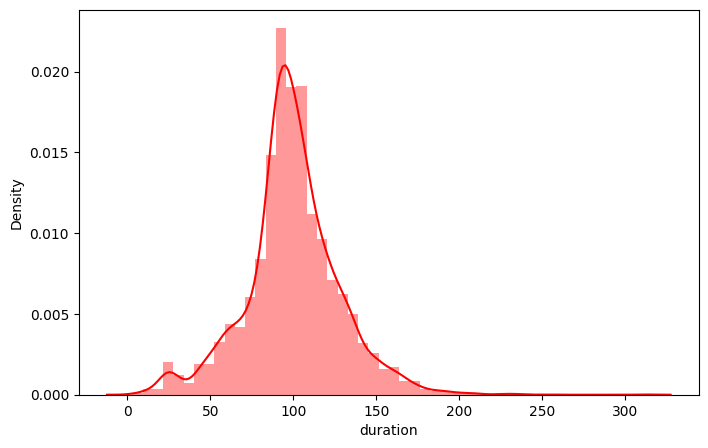

In [ ]:

# Visualization of movies duration distribution.
plt.figure(figsize=(8,5))
sns.distplot(Movie_df['duration'], color = 'red')

In [ ]:
# Movie statistics
df[df['type']== 'Movie'].duration.describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

* The range duration of the movies on Netflix is between 50 to 150 minutes. There are also some movies of 300 minutes.
* The length of a movie may range from 3 min to 312 minutes, and the distribution is almost normally distributed.

## **TV Shows Duration**

In [ ]:

# tv show df.
tv_df = df[df['type']=='TV Show']
tv_df['duration'].value_counts()

1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: duration, dtype: int64

<Axes: xlabel='duration', ylabel='count'>

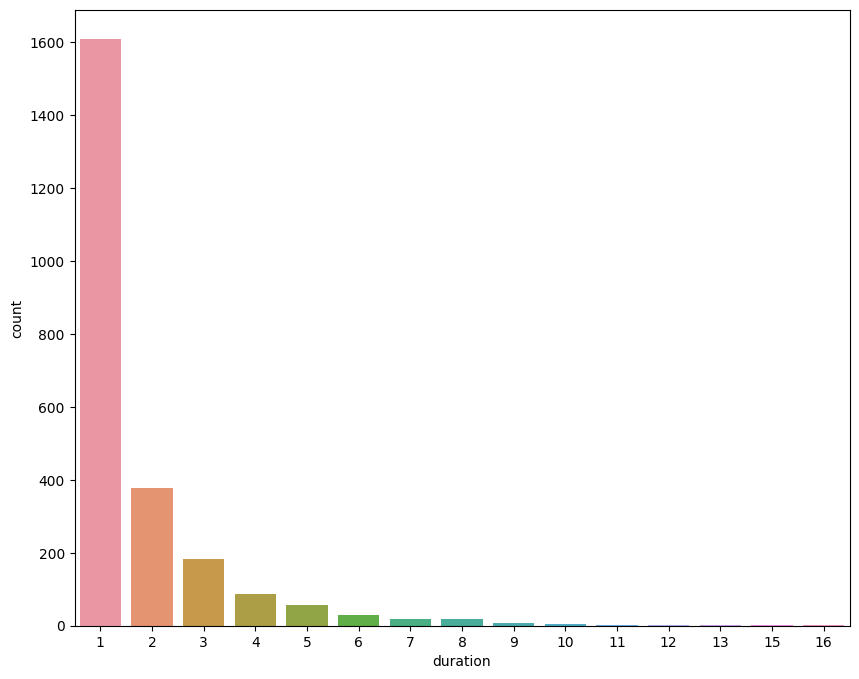

In [ ]:

# visualization of tv show duration.
plt.figure(figsize=(10,8))
sns.countplot(x = tv_df['duration'])

* Most TV Shows has only 1 or 2 seasons. There are only few TV Shows with more than 2 seasons.

## **Titles:**

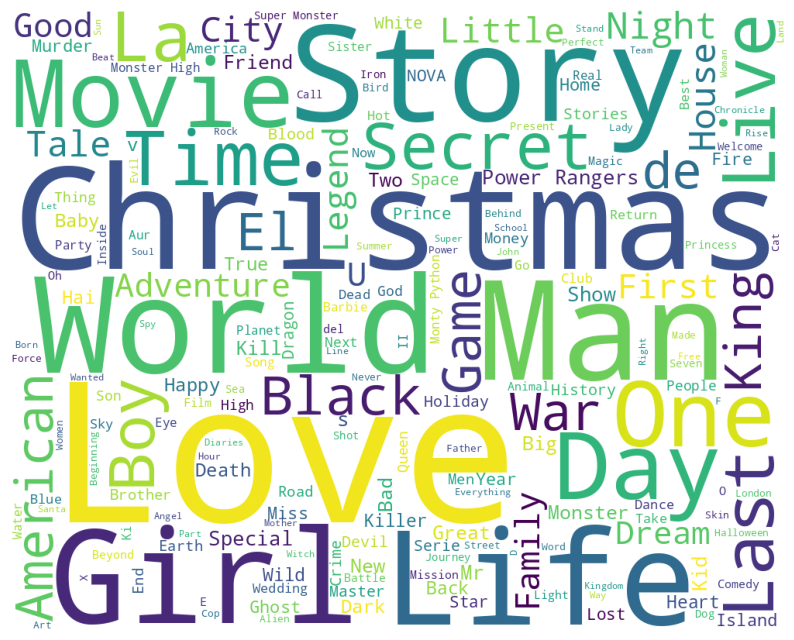

In [ ]:
# most frequent words used in titles.
#Importing wordcloud
from wordcloud import WordCloud, STOPWORDS

#Most occurred word in title
plt.subplots(figsize=(10,10))
stopwords = set(STOPWORDS)
text = " ".join(df.title)
wordcloud = WordCloud(stopwords=stopwords,background_color='white',width=1000,height=800).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

* Christmas, love, world, story, life, girl, etc are the most frequent words used in the title of the contents.

## 6.2 **Bivariate Analysis:**

**type content available in different countries.**

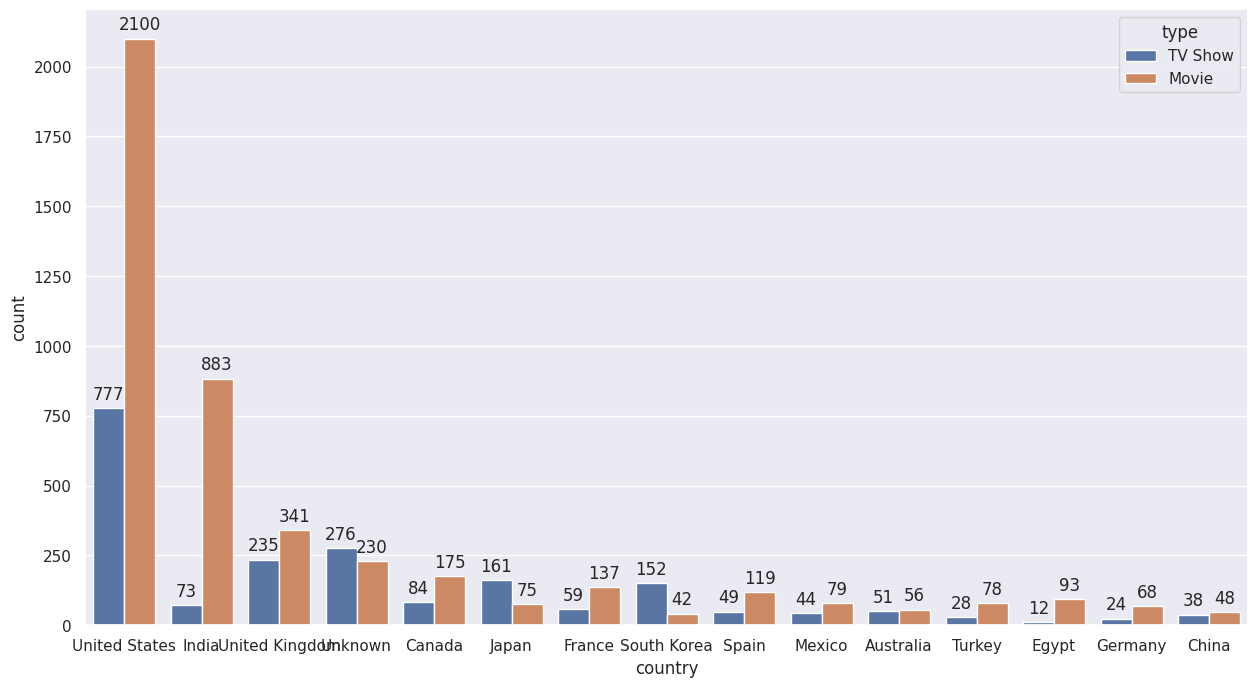

In [ ]:

# total production of country wrt type of the content.
plt.figure(figsize=(15,8))
p = sns.countplot(x = df['country'], hue='type', data = df, order = df['country'].value_counts().index[:15])
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


* US has the most number of movies and tv shows type content. While India comes in second place for movies on Netflix. But UK comes in second place in terms of tv shows. Followed by South Korea and Canada. Other countries have a very less number of contents added on Netflix.

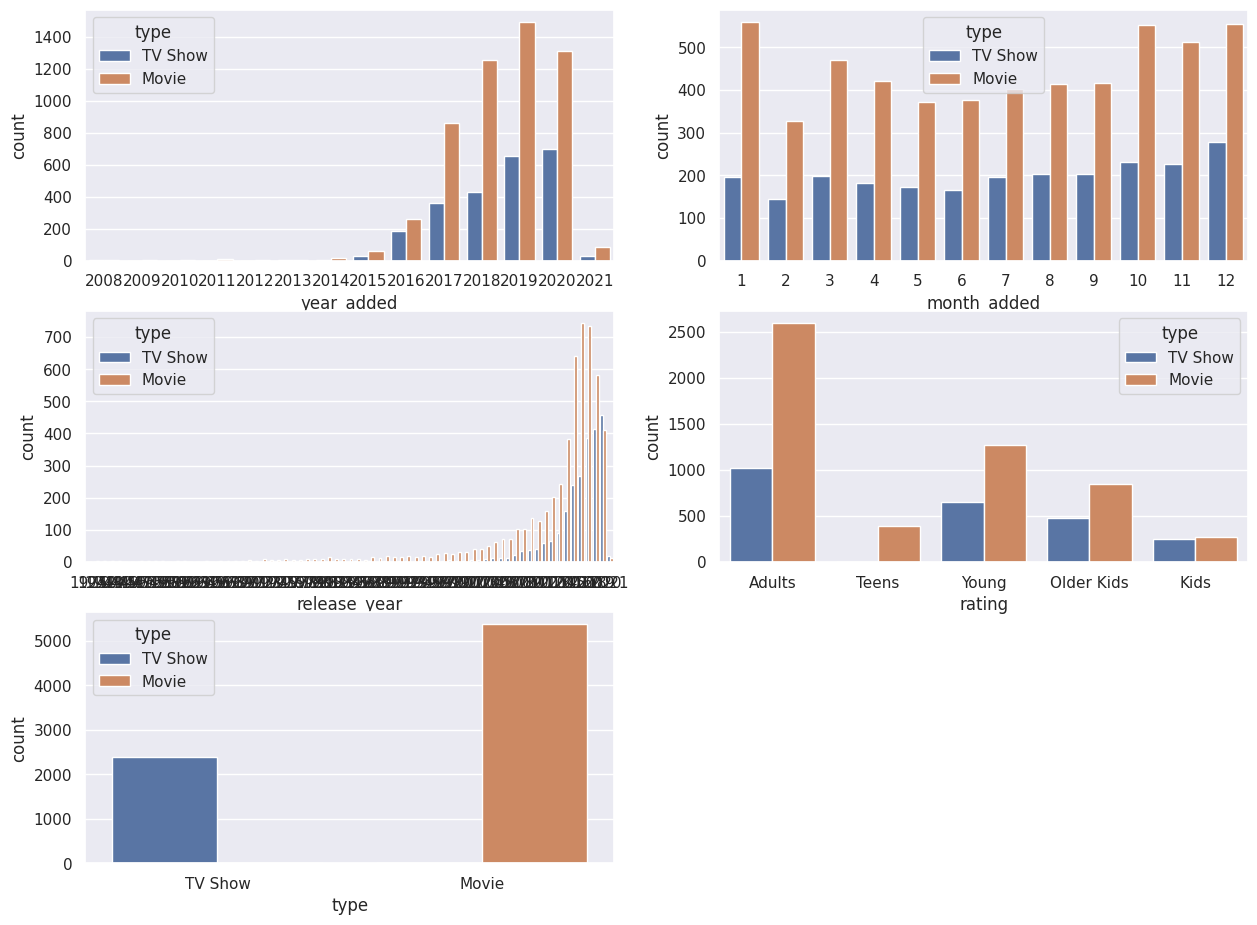

In [ ]:
var = ['year_added', 'month_added',  'release_year', 'rating', 'type']
# counts wrt type of the content.
plt.figure(figsize=(15,15))
for i in enumerate(var):
  plt.subplot(4, 2, i[0]+1)
  sns.countplot(x = i[1], hue = 'type', data = df)

**Insights Found.**

* Netflix has been increasingly focusing on TV Shows rather than movies in recent years.
* Most of the content on Netflix are added in the month of December and January. In Which movies are added the most.
* Maximum contents are added on the first day of the month.
* Adding the number of content on Netflix is increased in recent years.
* Most of the movies and tv shows are for adults. Very few contents are for kids.

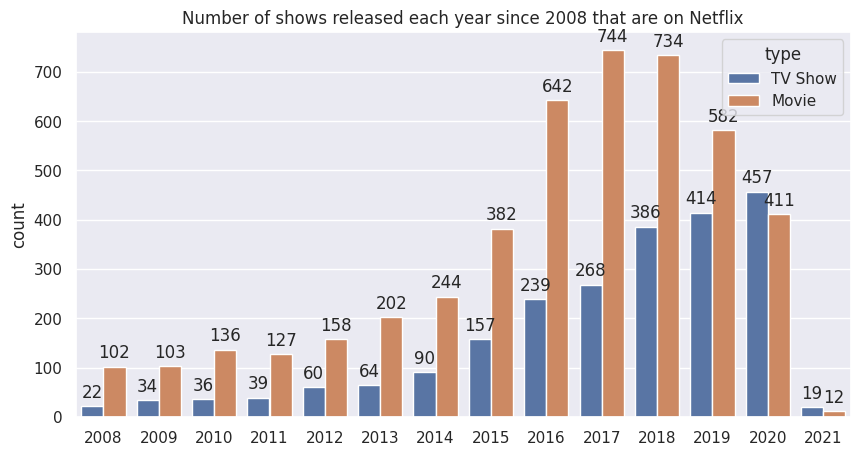

In [ ]:
# Number of shows released each year since 2008
order = range(2008,2022)
plt.figure(figsize=(10,5))
p = sns.countplot(x='release_year',data=df, hue='type',
                  order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


* Over the years, Netflix has consistently focused on adding more shows in its platform.
* Though there was a decrease in the number of movies added in 2020, this pattern did not exist in the number of TV shows added in the same year.
* This might signal that Netflix is increasingly concentrating on introducing more TV series to its platform rather than movies.

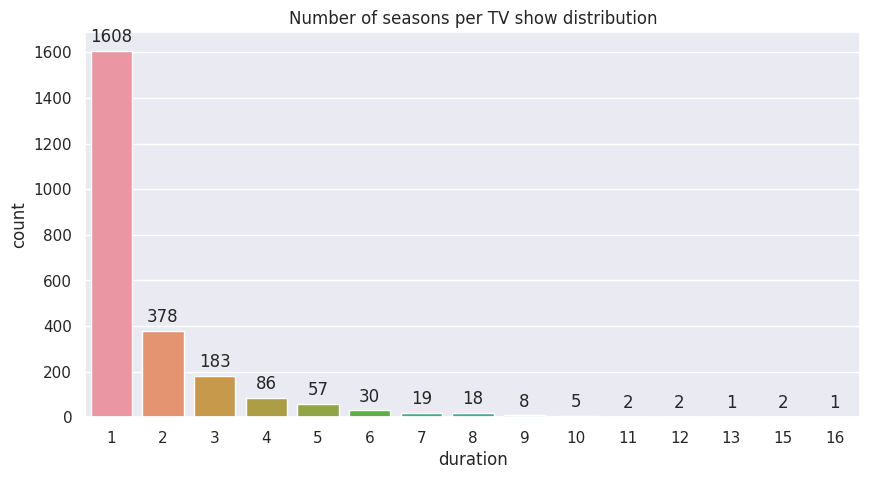

In [ ]:
# Seasons in each TV show
plt.figure(figsize=(10,5))
p = sns.countplot(x='duration',data=df[df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
# % of tv shows with just 1 season
len(df[(df['type']=='TV Show') & (df['duration']==1)]) / len(df[df['type']=='TV Show'])* 100

67.0

* The TV series in the dataset have up to 16 seasons, however the bulk of them only have one. This might mean that the majority of TV shows has only recently begun, and that further seasons are on the way.
* There are very few TV shows that have more than 8 seasons.

Text(0.5, 1.0, 'Top 10 genres for movies')

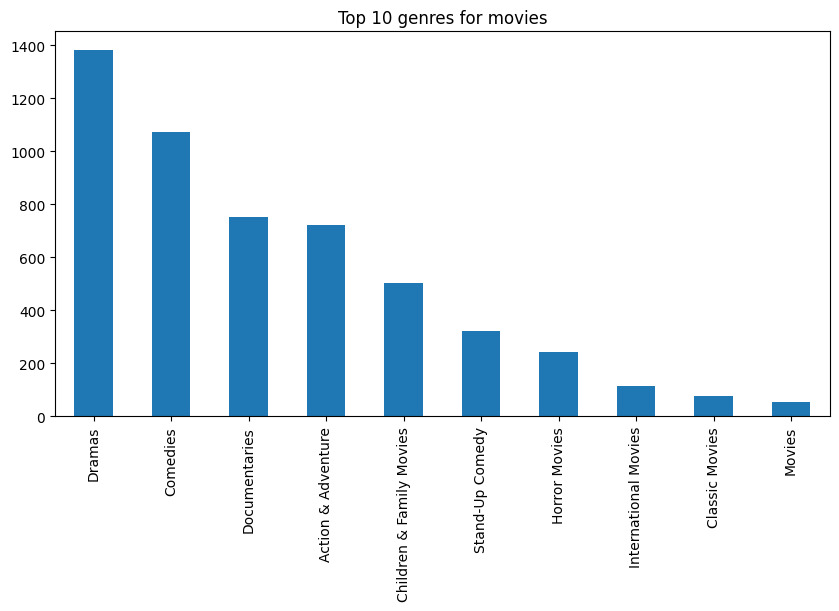

In [ ]:
# Top 10 genre for movies
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].listed_in.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 genres for movies')

* Dramas, comedies, and documentaries are the most popular genre for the movies on Netflix.

Text(0.5, 1.0, 'Top 10 genres for TV Shows')

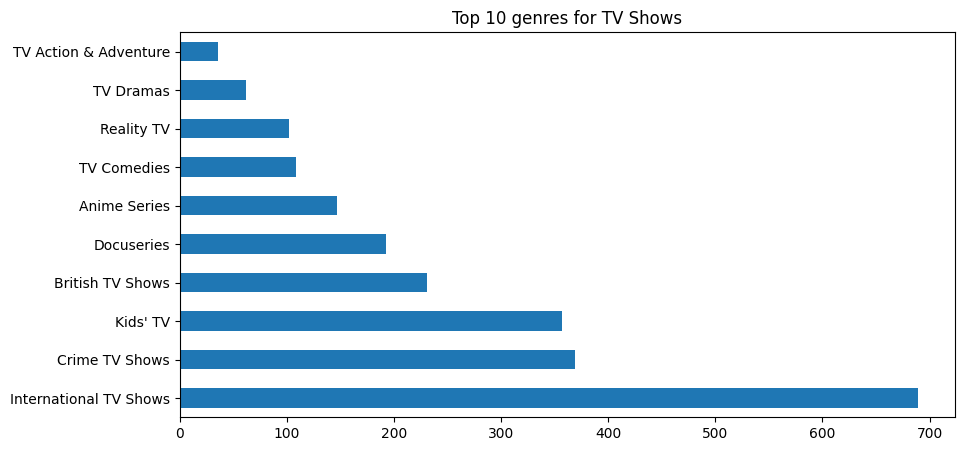

In [ ]:
# Top 10 genre for tv shows
plt.figure(figsize=(10,5))
df[df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for TV Shows')

* International, crime, and kids are the most popular genre for TV shows on Netflix.

Text(0.5, 1.0, 'Top 10 movie directors')

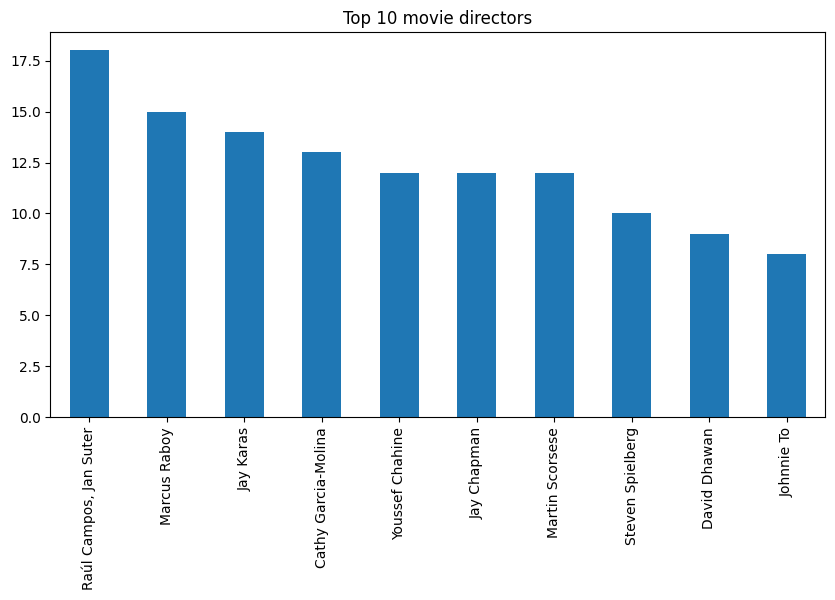

In [ ]:
# Top 10 movie directors
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='Movie')].director.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 movie directors')

* Raul Campos and Jan Suter have togather directed in 18 movies, higher than anyone yet.
* This is followed by Marcus Roboy, Jay Karas, and Cathy Gracia-Molina

Text(0.5, 1.0, 'Top 10 TV show directors')

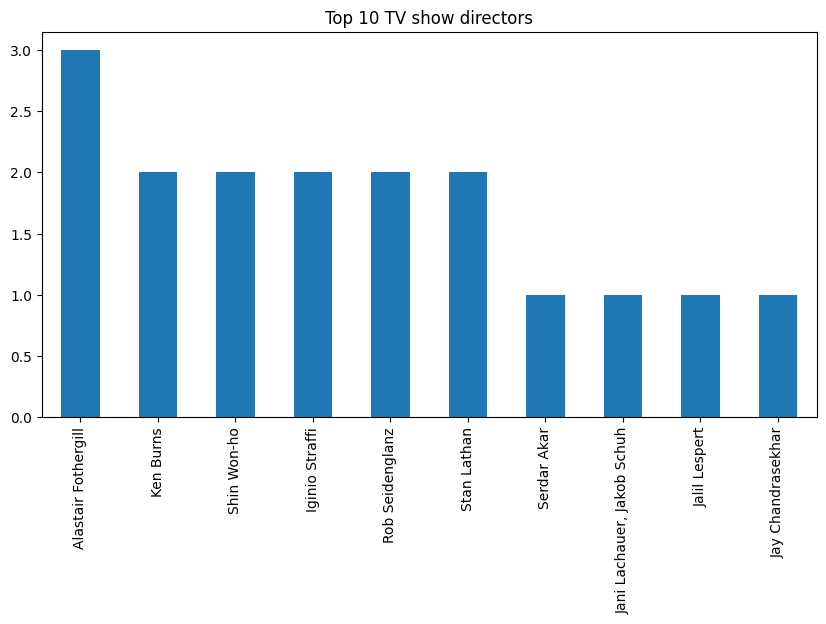

In [ ]:
# Top 10 TV show directors
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='TV Show')].director.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 TV show directors')

* Alastair Fothergill has directed three TV shows, the most of any director.
* Only six directors have directed more than one television show.

Text(0.5, 1.0, 'Actors who have appeared in highest number of movies')

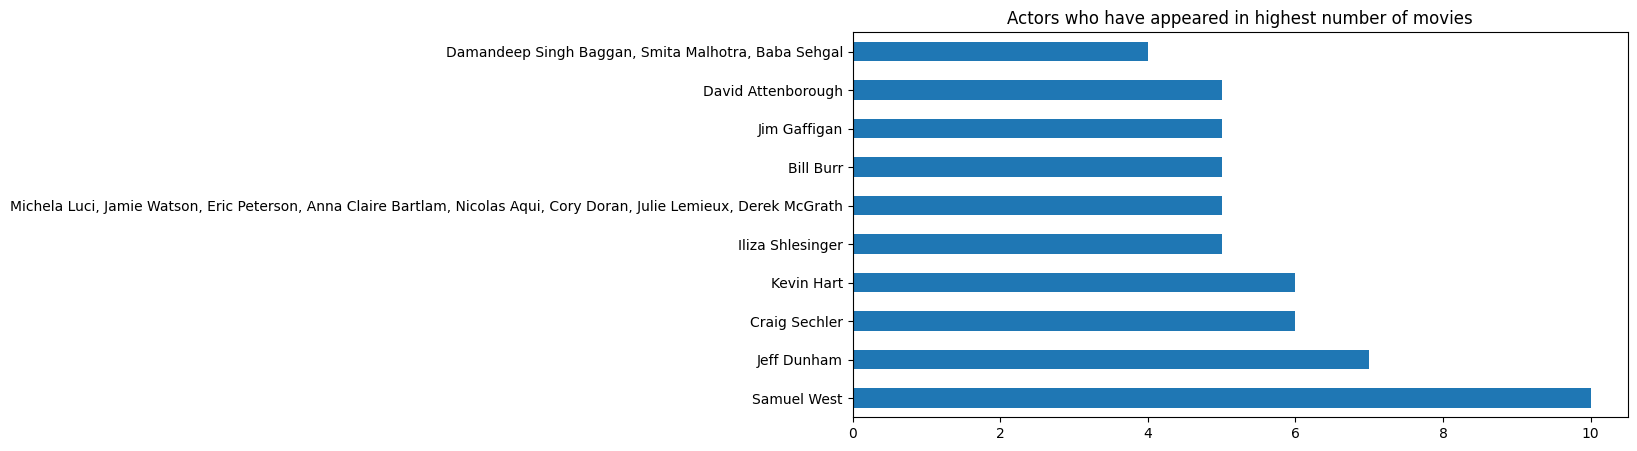

In [ ]:
# Top actors for movies
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of movies')

* Samuel West has appeared in 10 movies, followed by Jeff Dunham with 7  movies.

Text(0.5, 1.0, 'Actors who have appeared in highest number of TV shows')

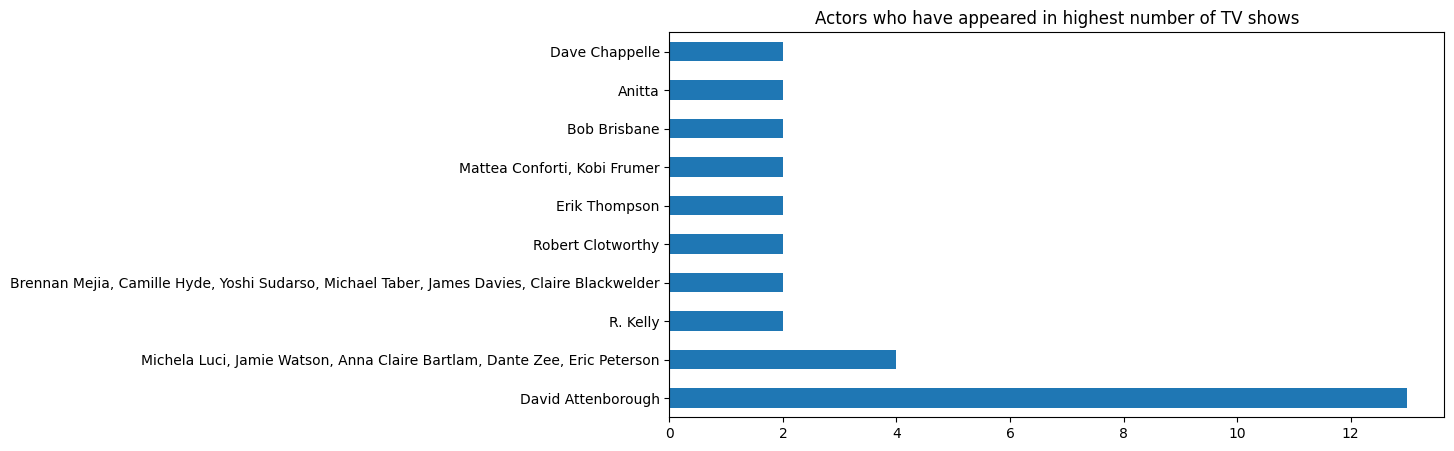

In [ ]:
# Top actors for TV shows
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of TV shows')

* David Attenborough has appeared in 13 TV shows, followed by Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson with 4 TV shows.

# 7. **Data preprocessing:**

 **Modelling Approach:**
* Select the attributes based on which you want to cluster the shows
* Text preprocessing: Remove all non-ascii characters, stopwords and punctuation marks, convert all textual data to lowercase.
* Lemmatization to generate a meaningful word out of corpus of words
* Tokenization of corpus
* Word vectorization
* Dimensionality reduction
* Use different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques
* Build optimal number of clusters and visualize the contents of each cluster using wordclouds.

We will cluster the shows on Netflix based on the following attributes:

* Director
* Cast
* Country
* Listed in (genres)
* Description

In [ ]:
# Combining all the clustering attributes into a single column

df['clustering_attributes'] = (df['director'] + ' ' +
                                df['cast'] +' ' +
                                df['country'] +' ' +
                                df['listed_in'] +' ' +
                                df['description'])

In [ ]:
df['clustering_attributes'][40]

'Muharrem Gülmez Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem Gülmez, Elif Nur Kerkük, Tarık Papuççuoğlu, Suzan Aksoy, Doğa Konakoğlu, Esin Eden, Deniz Özerman Turkey Comedies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

* We have successfully added all the necessary data into a single column

##**Removing non-ASCII characters:**

In [ ]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [ ]:
# remove non-ascii characters
df['clustering_attributes'] = remove_non_ascii(df['clustering_attributes'])

In [ ]:
df['clustering_attributes'][40]

'Muharrem Gulmez Erdem Yener, Ayhan Tas, Emin Olcay, Muharrem Gulmez, Elif Nur Kerkuk, Tark Papuccuoglu, Suzan Aksoy, Doga Konakoglu, Esin Eden, Deniz Ozerman Turkey Comedies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

* We have successfully removed all non-ascii characters from the corpus.

## **Remove stopwords and lower case:**

In [ ]:
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# Removing stop words
df['clustering_attributes'] = df['clustering_attributes'].apply(stopwords)

In [ ]:
df['clustering_attributes'][40]

'muharrem gulmez erdem yener, ayhan tas, emin olcay, muharrem gulmez, elif nur kerkuk, tark papuccuoglu, suzan aksoy, doga konakoglu, esin eden, deniz ozerman turkey comedies slacker owner public bath house rallies community save big developer comes town close open new mall.'

* We have successfully removed all the stopwords and converted the corpus to lowercase.

##**Remove punctuations:**

In [ ]:
# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
# Removing punctuation marks
df['clustering_attributes'] = df['clustering_attributes'].apply(remove_punctuation)

In [ ]:
df['clustering_attributes'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies slacker owner public bath house rallies community save big developer comes town close open new mall'

* We have successfully dropped all the punctuation marks from the corpus.

## **Lemmatization:**
Lemmatization is a text pre-processing technique used in natural language processing (NLP) models to break a word down to its root meaning to identify similarities. For example, a lemmatization algorithm would reduce the word better to its root word, or lemme, good.  

In [ ]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [ ]:
# Lemmatization
df['clustering_attributes'] = lemmatize_verbs(df['clustering_attributes'])

In [ ]:
df['clustering_attributes'][40]

'muharrem gulmez erdem yener, ayhan tas, emin olcay, muharrem gulmez, elif nur kerkuk, tark papuccuoglu, suzan aksoy, doga konakoglu, esin eden, deniz ozerman turkey comedies slacker owner public bath house rallies community save big developer comes town close open new mall.'

## **Tokenization:**

In [ ]:
tokenizer = TweetTokenizer()

In [ ]:
df['clustering_attributes'] = df['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))

The corpus is converted to tokens.

## **Vectorization:**

In [ ]:
# clustering tokens saved in a variable
clustering_data = df['clustering_attributes']

In [ ]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)
X = tfidf.fit_transform(clustering_data)

In [ ]:
X

<7777x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 222409 stored elements in Compressed Sparse Row format>

In [ ]:
X.shape

(7777, 20000)

In [ ]:
# data type of vector
type(X)


scipy.sparse._csr.csr_matrix

In [ ]:
# convert X into array form for clustering
X = X.toarray()

## **Dimensionality reduction using PCA:**

We can use PCA (Principal component Analysis) to reduce the dimensionality of data.

In [ ]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

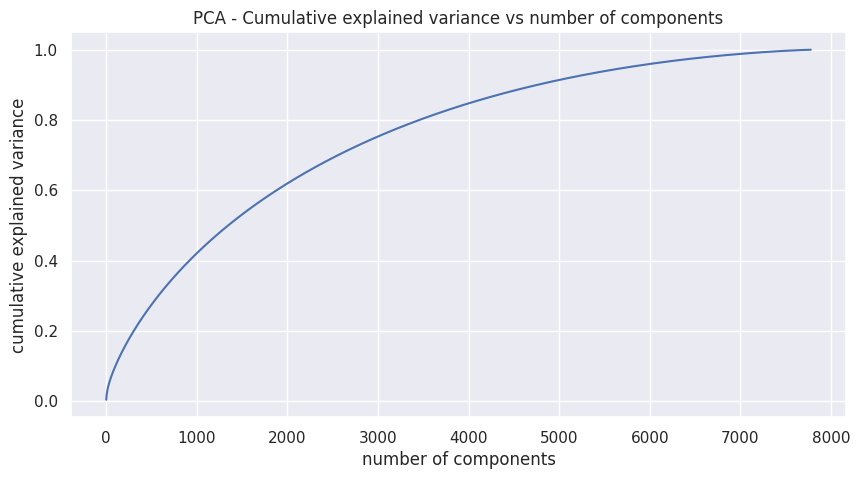

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

We find that 100% of the variance is explained by about ~7500 components.
Also, more than 80% of the variance is explained just by 4000 components.
Hence to simplify the model, and reduce dimensionality, we can take the top 4000 components, which will still be able to capture more than 80% of variance.

In [ ]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=42)
pca.fit(X)

PCA(n_components=4000, random_state=42)

In [ ]:
# transformed features
x_pca = pca.transform(X)

In [ ]:
# shape of transformed vectors
x_pca.shape

(7777, 4000)

We have successfully reduced the dimensionality of data using PCA.

# **Clusters implementation:**

## **K-Means Clustering:**

K-means clustering is a popular machine learning technique used for grouping data points into clusters. It works by dividing a dataset into 'k' distinct clusters based on the similarity of data points. The algorithm starts with 'k' initial cluster centroids and assigns each data point to the nearest centroid. It then recalculates the centroids as the mean of the data points in each cluster and repeats this process iteratively until convergence. K-means is widely used for data segmentation, pattern recognition, and data analysis tasks.








Visualizing the elbow curve and Silhouette score to decide on the optimal number of clusters for K-means clustering algorithm.

Text(0, 0.5, 'WCSS')

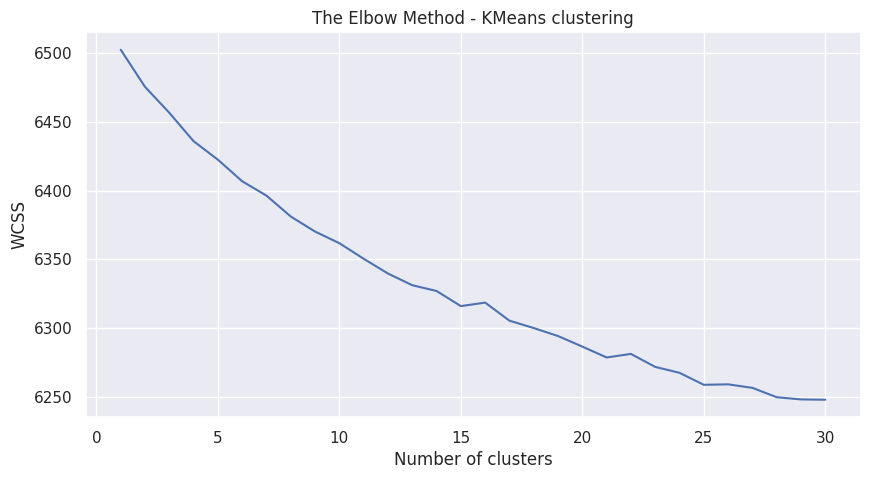

In [ ]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

The sum of squared distance between each point and the centroid in a cluster (WCSS) decreases with the increase in the number of clusters.

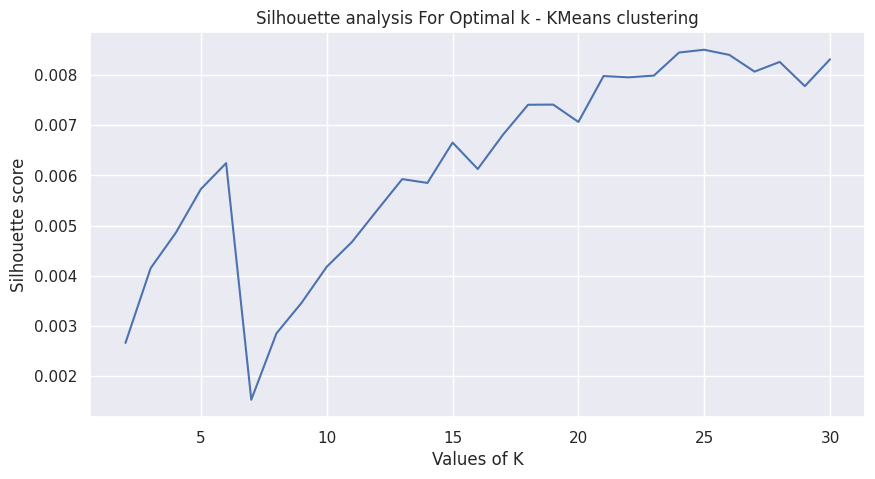

In [ ]:
# Plotting Silhouette score for different umber of clusters
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

The highest Silhouette score is obtained for 6 clusters.

Building 6 clusters using the k-means clustering algorithm:

In [ ]:
#Clustering the data into 19 clusters
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 33)
kmeans.fit(x_pca)

KMeans(n_clusters=6, random_state=33)

In [ ]:
#Evaluation metrics - distortion, silhoutte score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion, kmeans_silhouette_score))



(6406.838539336664, 0.0062448261647260125)


In [ ]:
#adding kmeans cluster number attributes
df['kmeans_cluster'] = kmeans.labels_

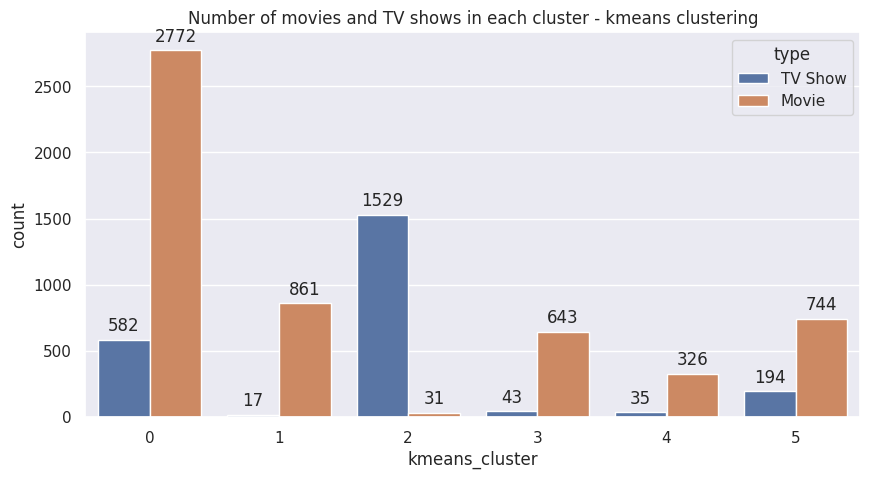

In [ ]:
#Number of movies and tv shows in each cluster
plt.figure(figsize =(10,5))
q = sns.countplot(x ='kmeans_cluster', data = df, hue = 'type')
plt.title('Number of movies and TV shows in each cluster - kmeans clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width()/2. , i.get_height()), ha = 'center', va = 'center', xytext = (0,10), textcoords = 'offset points')


Successfully built 6 clusters using the k-means clustering algorithm.

## **Building wordclouds for different clusters built:**

Wordclouds are useful tools for assessing the results of clustering. They visually show what's inside each cluster by highlighting common words and the main themes. They also help in naming clusters by giving you ideas about how to describe them. Wordclouds can point out data points in a cluster that don't fit because they show words that don't match the cluster's main theme.

Comparing wordclouds from different clusters helps you understand how they are similar or different, giving insights into cluster relationships. Wordclouds can also help you judge how good your clustering is – high-quality clusters have clear wordclouds. They can guide you in adjusting clustering parameters, like when clusters are too broad or have mixed themes. By using wordclouds in an ongoing process, you can see how changes to parameters and clusters affect the overall clustering outcome.











In [ ]:
# Building a wordcloud for the movie descriptions
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df[df['kmeans_cluster']==cluster_num].description.values:

      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()

      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)



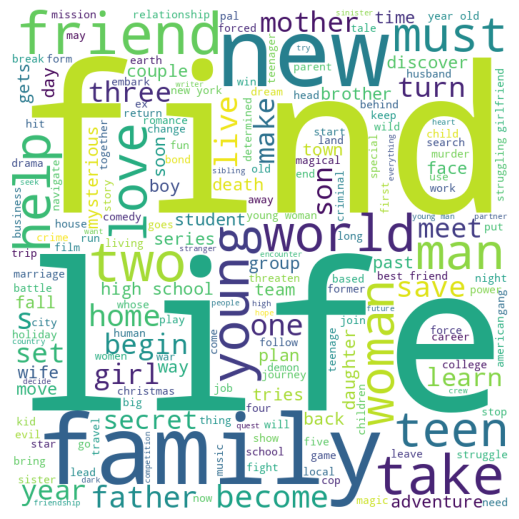

In [ ]:
#WordCloud for cluster 0
kmeans_worldcloud(0)

Keywords observed in cluster 0: life, new, family, friend, save, help, discover, home, teen

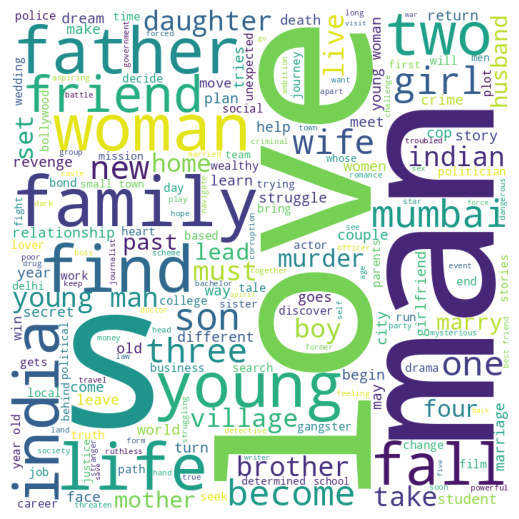

In [ ]:
#Wordcloud for cluster 1
kmeans_worldcloud(1)

Keywords observed in cluster 1: life, love, family, father, young, girl, man, woman, friend, daughter

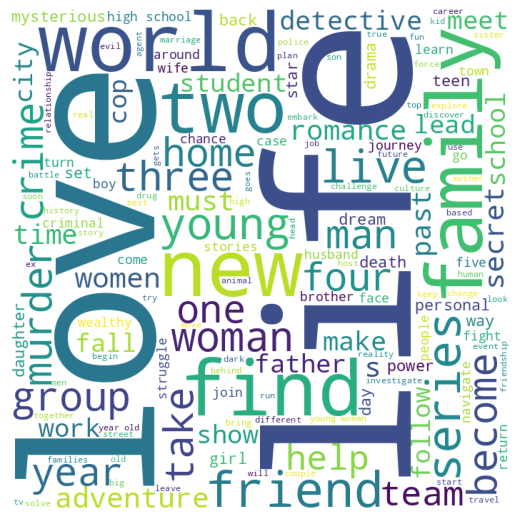

In [ ]:
#WordCloud for cluster 2
kmeans_worldcloud(2)

Keywords observed in cluster 2: young,love, world, girl, mysterious, humanity, life, student, school, battle, demon, force

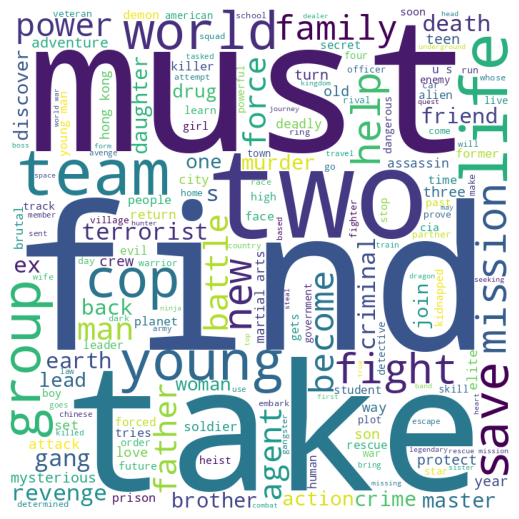

In [ ]:
#WordCloud for cluster 3
kmeans_worldcloud(3)

Keywords observed in cluster 3: love, life, family, romance, crime, murder, world, adventure

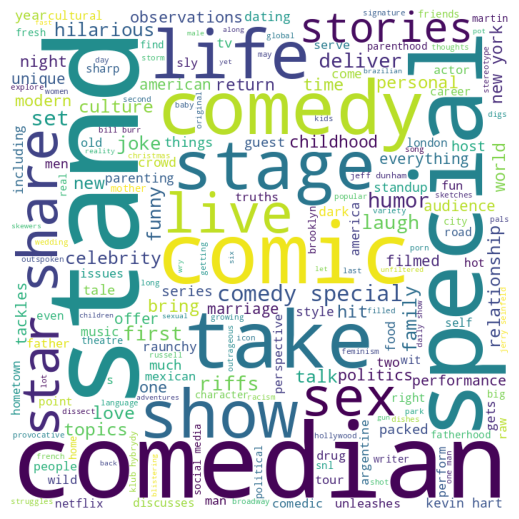

In [ ]:
#WordCloud for cluster 4
kmeans_worldcloud(4)

Keywords observed in cluster 4: comedian, special, stand, comic, stage, sex, joke

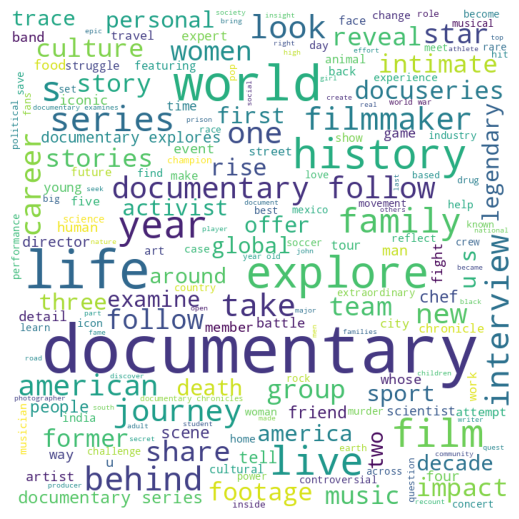

In [ ]:
#WordCloud for cluster 5
kmeans_worldcloud(5)

Keywords observed in cluster 5: documentary, world, life, filmmaker, american, life

# **Hierarchical clustering:**

It builds a hierarchy of clusters by successively merging or splitting existing clusters. There are two main approaches:

* Agglomerative (Bottom-Up) Hierarchical Clustering: It begins with each data point as its cluster and then repeatedly merges the two closest clusters into a larger cluster. This process continues until all data points belong to a single cluster or a specified number of clusters are reached.

* Divisive (Top-Down) Hierarchical Clustering: It starts with all data points in a single cluster and then recursively divides the cluster into smaller clusters until a certain criterion is met or a predefined number of clusters is reached.

Hierarchical clustering results in a tree-like structure called a dendrogram, which visualizes the relationships between data points and clusters. The choice of cutting the dendrogram at a specific level determines the number of clusters in the final partitioning. Hierarchical clustering is useful for exploring data with hierarchical structures and understanding the relationships between data points at different levels of granularity.







Visualizing the dendrogram to decide on the optimal number of clusters for the agglomerative (hierarchical) clustering algorithm:

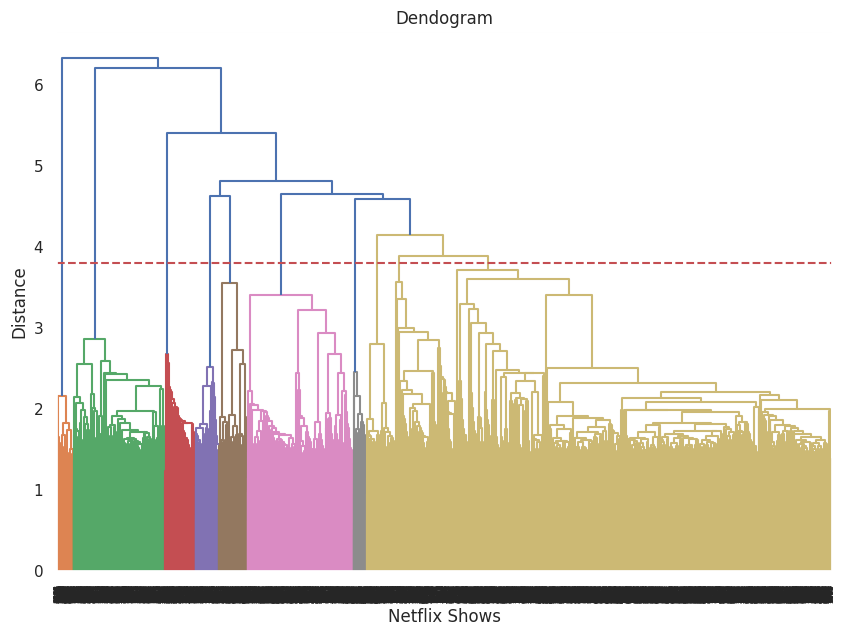

In [ ]:
#building a dendogram to decide on the number of clusters
plt.figure(figsize = (10,7))
dend = shc.dendrogram(shc.linkage(x_pca, method = 'ward'))
plt.title('Dendogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y=3.8, color = 'r', linestyle = '--')

At a distance of 3.8 units, 12 clusters can be built using the agglomerative clustering algorithm.

Building 12 clusters using the Agglomerative clustering algorithm:

In [ ]:
#fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters = 12, affinity = 'euclidean', linkage = 'ward')
hierarchical.fit_predict(x_pca)

array([4, 3, 1, ..., 2, 2, 2])

In [ ]:
#adding hierarchical cluster number attributes
df['hierarchical_cluster'] = hierarchical.labels_

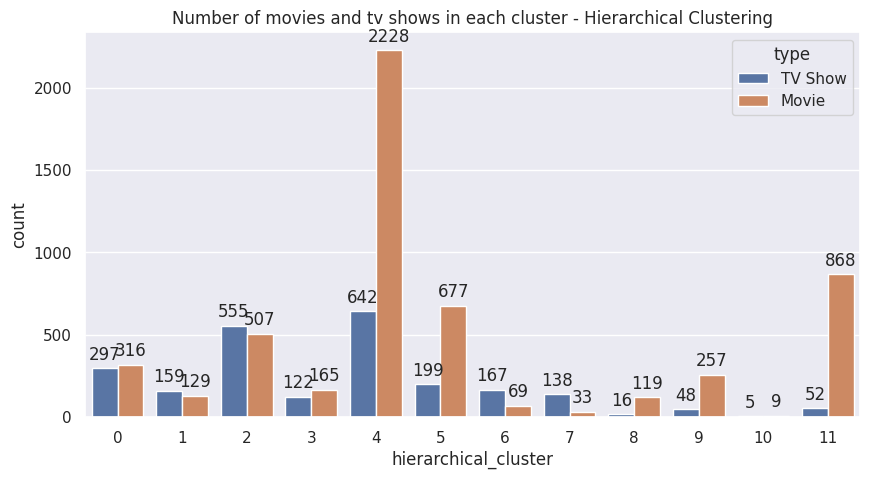

In [ ]:
#number of movies and tv shows in each cluster
plt.figure(figsize = (10,5))
q = sns.countplot(x = 'hierarchical_cluster', data = df, hue = 'type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'),(i.get_x() + i.get_width()/2., i.get_height()), ha= 'center', va ='center', xytext = (0,10), textcoords = 'offset points')

Successfully built 12 clusters using the Hierarchical clustering algorithm.

In [ ]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df[df['hierarchical_cluster']==cluster_num].description.values:

      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()

      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

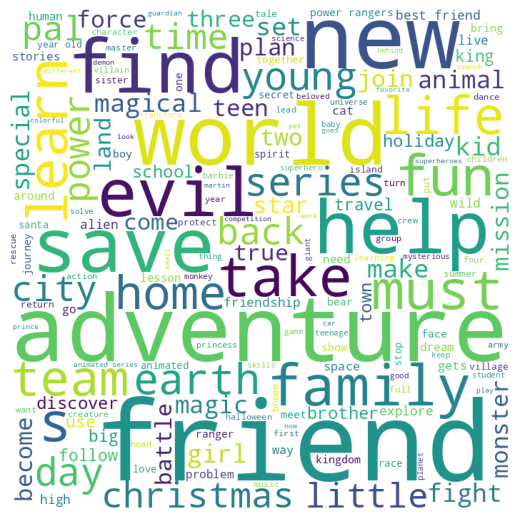

In [ ]:
# Wordcloud for cluster 0
hierarchical_worldcloud(0)

Keywords observed in cluster 0: life, new, find, family, save, friend, young, teen, adventure

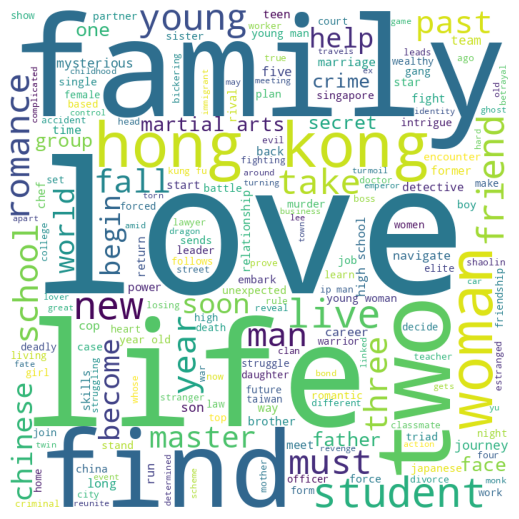

In [ ]:
#WordCloud for cluster 1
hierarchical_worldcloud(1)

Keywords observed in cluster 1: love, family, life, student, romance, school, woman, master, father

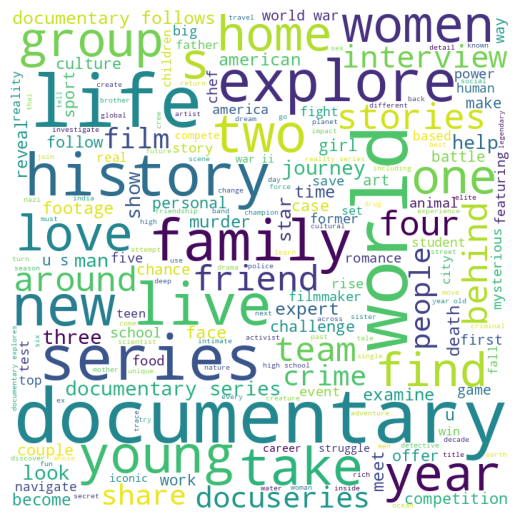

In [ ]:
#WordCloud for cluster 2
hierarchical_worldcloud(2)

Keywords observed in cluster 2: life, new, series, crime, world, murder, history, detective

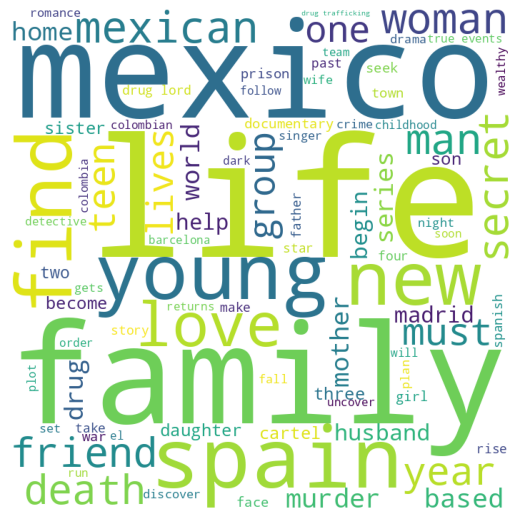

In [ ]:
#WordCloud for cluster 3
hierarchical_worldcloud(3)

Keywords observed in cluster 3: family, life, love, friend, teen, woman, man, young, world, wedding, secret

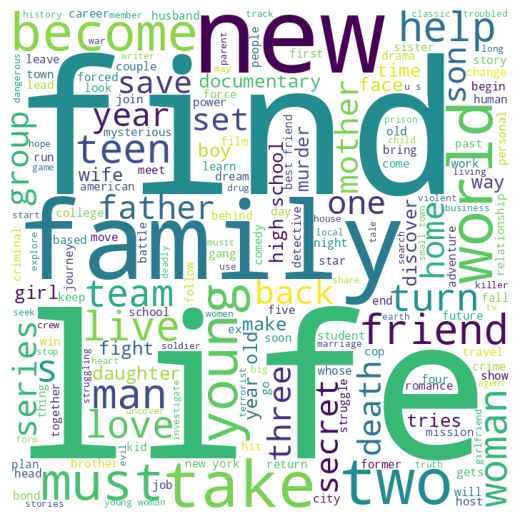

In [ ]:
#WordCloud for cluster 4
hierarchical_worldcloud(4)

Keywords observed in cluster 4: documentary, music, world, team, interview,history, family, career, battle, death

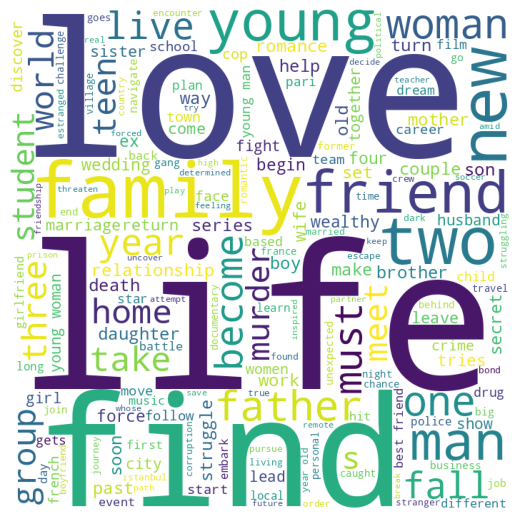

In [ ]:
#WordCloud for cluster 5
hierarchical_worldcloud(5)

Keywords observed in cluster 5: family, life, mexico, young, new, woman, man, secret, spain, death, singer

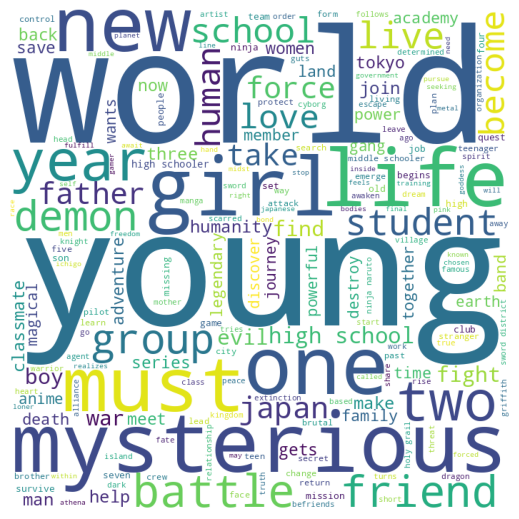

In [ ]:
#WordCloud for cluster 6
hierarchical_worldcloud(6)

Keywords observed in cluster 6: young, life, girl, world, friend, mysterious, demon, student, school, father

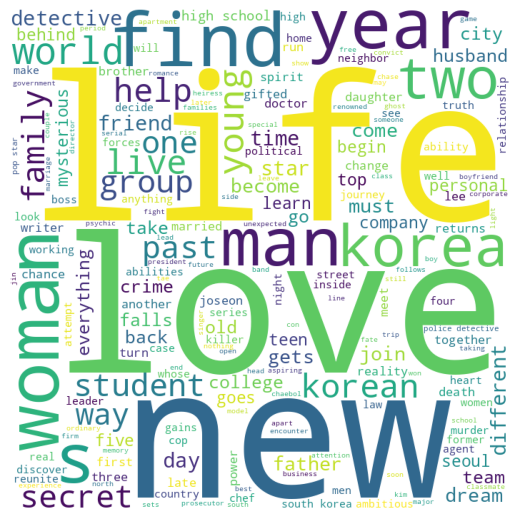

In [ ]:
#WordCloud for cluster 7
hierarchical_worldcloud(7)

Keywords observed in cluster 7: love, life, woman, new, student, family, korea, secret, detective, young

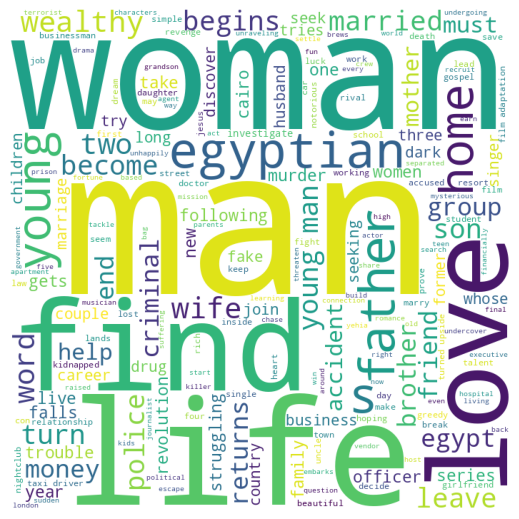

In [ ]:
#WordCloud for cluster 8
hierarchical_worldcloud(8)

Keywords observed in cluster 8: woman, man life, egypt, wealthy, money, young, love, revolution, struggling

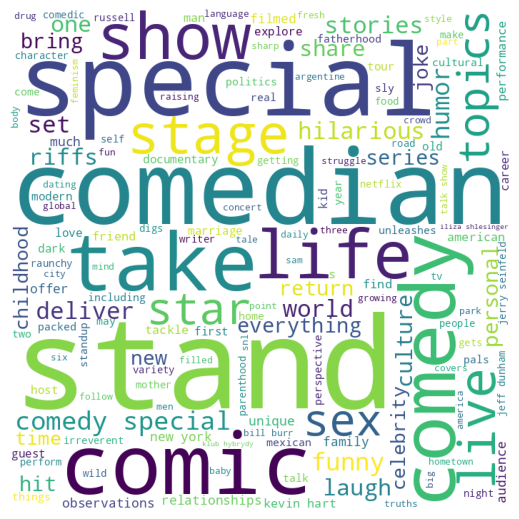

In [ ]:
#WordCloud for cluster 9
hierarchical_worldcloud(9)

Keywords observed in cluster 9: comedian, stand, life, comic, special, show, live, star, stage, hilarious, stories

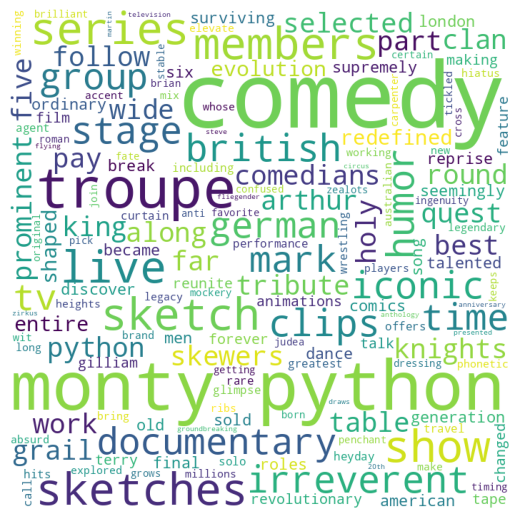

In [ ]:
#WordCloud for cluster 10
hierarchical_worldcloud(10)

Keywords observed in cluster 10: animal, nature, explore, planet, species, survive, natural, life, examine, earth

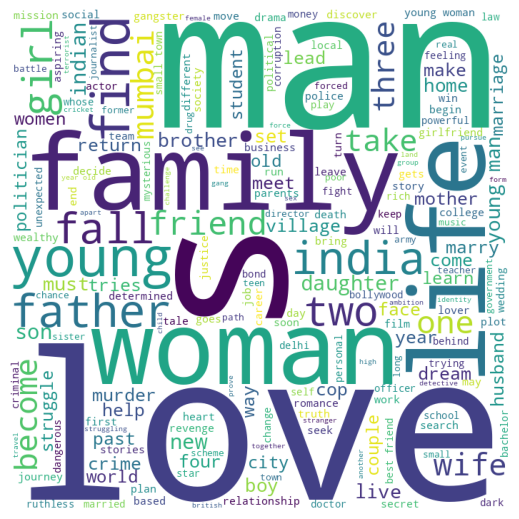

In [ ]:
#WordCloud for cluster 11
hierarchical_worldcloud(11)

Keywords observed in cluster 11: love, man, woman, india, father, friend, girl, mumbai, city, learn, young

# **Content based recommender system:**

* We can build a simple content based recommender system based on the similarity of the shows.
* If a person has watched a show on Netflix, the recommender system must be able to recommend a list of similar shows that s/he likes.
* To get the similarity score of the shows, we can use cosine similarity
The similarity between two vectors (A and B) is calculated by taking the dot product of the two vectors and dividing it by the magnitude value as shown in the equation below. We can simply say that the CS score of two vectors increases as the angle between them decreases.

In [ ]:
#defining new df for building a recommender system
recommender_df = df.copy()

In [ ]:
#changing the index of the df from show id to show title
recommender_df['show_id'] = recommender_df.index

In [ ]:
# converting tokens to string
def convert(lst):
  return ' '.join(lst)

recommender_df['clustering_attributes'] = recommender_df['clustering_attributes'].apply(lambda x: convert(x))

In [ ]:
#setting title of movies/tv shows as index
recommender_df.set_index('title', inplace = True)

In [ ]:
#count vectorizer
CV = CountVectorizer()
convert_matrix = CV.fit_transform(recommender_df['clustering_attributes'])

In [ ]:
#cosine similarities
cosine_similarity = cosine_similarity(convert_matrix)

In [ ]:
cosine_similarity.shape

(7777, 7777)

In [ ]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(recommender_df.index)

def recommend_10(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(recommender_df.index)[i])
    print("If you liked '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'

In [ ]:
# Recommendations for 'A Man Called God'
recommend_10('A Man Called God')

If you liked 'A Man Called God', you may also enjoy:



['One Spring Night',
 'Mr. Sunshine',
 'Rugal',
 'The King: Eternal Monarch',
 'My Mister',
 'Illang: The Wolf Brigade',
 'Extracurricular',
 'The Lies Within',
 'Reply 1994',
 'Private Lives']

In [ ]:
# Recommendations for 'Stranger Things'
recommend_10('Stranger Things')

If you liked 'Stranger Things', you may also enjoy:



['Beyond Stranger Things',
 'Tread',
 'Prank Encounters',
 'Zombie Dumb',
 'Kiss Me First',
 'Henry Danger',
 'Living Undocumented',
 'Haunted',
 'Drug Lords',
 'Million Dollar Beach House']

In [ ]:
# Recommendations for 'Peaky Blinders'
recommend_10('Peaky Blinders')

If you liked 'Peaky Blinders', you may also enjoy:



['Rebellion',
 'The Blue Planet: A Natural History of the Oceans',
 'Mega Food',
 'I AM A KILLER: RELEASED',
 'Botched Up Bodies',
 'The Hunt',
 'The Murder Detectives',
 'Inside The Freemasons',
 'Happy Valley',
 'The Making of Frozen Planet']

In [ ]:
# Recommendations for 'Lucifer'
recommend_10('Lucifer')

If you liked 'Lucifer', you may also enjoy:



['Rica, Famosa, Latina',
 'Exhibit A',
 'Trial By Media',
 'Women Behind Bars',
 'Inside the Criminal Mind',
 'Cold Case Files',
 'Trial 4',
 'The Confession Tapes',
 'Terrorism Close Calls',
 'The Keepers']

In [ ]:
# Recommendations for 'XXX'
recommend_10('XXX')

'Invalid Entry'

Invalid because the show 'XXX' is not available on Netflix.

# **Conclusion:**

* In this project, we worked on a text clustering problem wherein we had to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.
* The dataset contained about 7787 records, and 11 attributes.
* We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).
* It was found that Netflix hosts more movies than TV shows on its platform, and the total number of shows added on Netflix is growing exponentially. Also, majority of the shows were produced in the United States, and the majority of the shows on Netflix were created for adults and young adults age group.
* It was decided to cluster the data based on the attributes: director, cast, country, genre, and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.
* Through TFIDF Vectorization, we created a total of 20000 attributes.
* We used Principal Component Analysis (PCA) to handle the curse of dimensionality. 4000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 4000.
* We first built clusters using the k-means clustering algorithm, and the optimal number of clusters came out to be 6. This was obtained through the elbow method and Silhouette score analysis.
* Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 12. This was obtained after visualizing the dendrogram.
* A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.